<a href="https://colab.research.google.com/github/lykBhanu/DataScienceProjects/blob/main/WebAdOptimization_UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WebAdOptimization_UpperConfidenceBound_ReinforcementLearning

Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


Importing the Dataset

In [4]:
dataset=pd.read_csv('dataset.csv')
print(dataset.shape)
print(dataset.head(5))

(11, 10)
   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9   Ad 10
0     1     0     0     0     1     0     0     0      1      0
1     0     0     0     0     0     0     0     0      1      0
2     0     0     0     0     0     0     0     0      0      0
3     0     1     0     0     0     0     0     1      0      0
4     0     0     0     0     0     0     0     0      0      0


Upper Confidence Bound

In [5]:
import math
observations=11
no_of_Ads=10
ads_selected=[]
numbers_of_selections_of_each_ads=[0]*no_of_Ads
sums_of_rewards_of_each_ads=[0]*no_of_Ads
total_reward=0
for n in range(0,observations):
  ad=0
  max_upper_bound=0
  for i in range(0,no_of_Ads):
    if(numbers_of_selections_of_each_ads[i]>0):
      average_reward=sums_of_rewards_of_each_ads[i]/numbers_of_selections_of_each_ads[i]
      delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections_of_each_ads[i])
      upper_bound=average_reward+delta_i
    else:
      upper_bound=1e400
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=i
  ads_selected.append(ad)
  numbers_of_selections_of_each_ads[ad]=numbers_of_selections_of_each_ads[ad]+1
  reward=dataset.values[n,ad]
  sums_of_rewards_of_each_ads[ad]=sums_of_rewards_of_each_ads[ad]+reward
  total_reward=total_reward+reward

print("Rewards by Ads= ",sums_of_rewards_of_each_ads)
print("Total Rewards by UCB= ",total_reward)
print("Ads selected at each round: ",ads_selected)



Rewards by Ads=  [1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Total Rewards by UCB=  2
Ads selected at each round:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0]


Visualizing Result

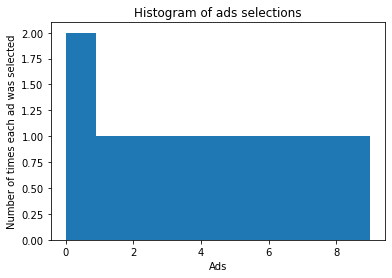

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()